In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [47]:
with open('HDR_PL.pickle', 'rb') as f:
    d = pickle.load(f)
wl = d['wl']

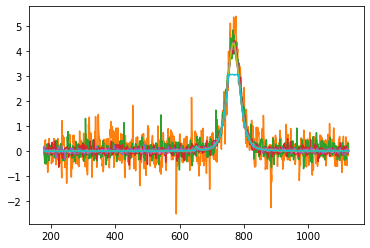

In [32]:
for i, (dwell, o, r) in enumerate(zip(d['dwelltimes'], d['off'], d['rpl'])):
    if i == 0:
        continue
#     plt.plot(wl, o, color=plt.cm.tab10(i), linestyle=':')
    plt.plot(wl, (r-o)/dwell, color=plt.cm.tab10(i), label=dwell)
# plt.ylim(top=10000)

In [52]:
cps_overall = (d['rpl'][0]-d['off'][0])/d['dwelltimes'][0]
idx = np.zeros(cps_overall.shape)
for i, (dwell, o, r) in enumerate(zip(d['dwelltimes'], d['off'], d['rpl'])):
    if i == 0:
        continue
    mask = r < 2**16 * 0.95
    cps = (r-o)/dwell
    cps_overall[mask] = cps[mask]
    idx[mask]=i

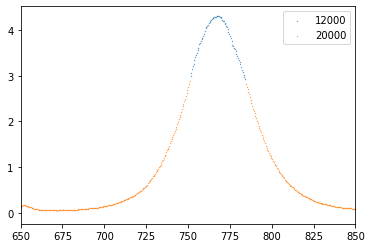

In [60]:
for i, dw in enumerate(d['dwelltimes']):
    mask = idx==i
    if any(mask):
        plt.scatter(wl[mask], cps_overall[mask], label=dw, s=0.1)

plt.xlim(650,850)

# plt.yscale('log')

plt.legend()

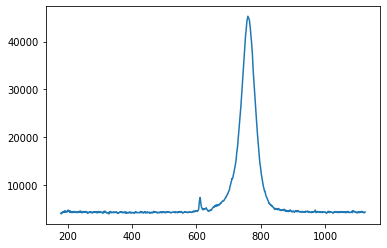

In [30]:
plt.plot(wl, d['bpl'][0])

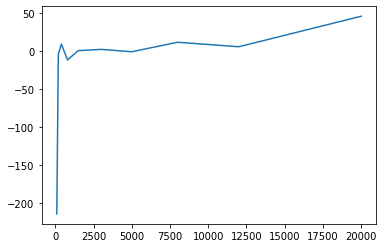

In [17]:
plt.plot(d['dwelltimes'], (d['rpl'][:,50:200]-d['off'][:,50:200]).mean(axis=1))